# Explore the relationships between deprivation and 'very good health rate' in Glasgow
##Introduction
This exploration based on Index of Multiple Deprivation (IMD) and the Scottish census in 2011 to explore the correlations and relationships between those two varibles in Glasgow. Quantify two variables using a graph and explore their correlation. The spatial regression model explores the spatial relationship between two variables and uses MSE to judge the accuracy of the model. Finally, the accurate model output is presented in the form of a map.
##Progress of good health rate and deprivation analysis in Glasgow
###Step 1. Data Collection
The objective of this research endeavor is to comprehensively analyze and elucidate the interplay and associations between the Index of Multiple Deprivation (IMD) and demographic data derived from the 2011 Scottish census within the context of Glasgow, thereby providing a nuanced understanding of socio-economic dynamics within the region. And the areas based on the data zone in 2011, which confirm the all data have the regional diviation.
###Step 2. Data Cleaning
The study focuses on selecting specific areas within Glasgow from the multitude of data zones recorded in the 2011 Scottish census. This meticulous selection process ensures a targeted examination of socio-economic characteristics within Glasgow's diverse neighborhoods, facilitating a more precise analysis of the correlations between the Index of Multiple Deprivation (IMD) and demographic factors.

And using box plot and scatter plot to check for the outliers and trends, which found several outliers in the dataset and the greater good health rate in the rich areas.
###Step 3. Spatical Regression Analysis
Using spatical regression analysis to explore the spatial autocorrelation between good health rates and deprivation indices using spatial regression analysis.

First of all, the strong and positive correlation, 0.83, between two variables proved the features can apply this model.

Then, The health rate was then used as the independent variable and the deprivation index as the dependent variable respectively in the model. Then use deprivation as the independent variable and health rate as the dependent variable, and apply the model again.
##Step 4. Check the results of models
Using Mean Square Error (MSE) to check the predicted values wether accurate to judge the accurate of the model.
The model exlpores how much good health rate affects deprivation index shows 2.42 MSE, which is too great for the original values. As the result, the model should be further discussed and developed.
The model taht researches the effect on deprivation for health rate shows 0.00295 MSE, which fair enough to prove the accurate of the model.
###Step 5. Visulization
Select the predicted values of the model which explores how much deprivation affects health rate. And map those data on the map of Glasgow.

The area in the northernmost area has the higher 'very good health rate'. Most zones surronding it in the northern Glasgow generally have the lower good health rate. In the western Glasgow, upon the Rive Clyde, most zones have the unfavorable ratios, except some area at in the eastern most corners, which have higher good health situation. In the west of Glasgow, upon Clyde River, some areas have the better situation. But many discts in the western most corner have bad situation in health.

Below the River Clyder, many residents in the eastern districts don't have very good health rate. The people live in the west zones below River Clyder a little better than people in the west below the river, but still have the lower health situation. The citizen in the centre of the southern Glasgow (below the River Clyder) have higher health situation.

#Above contents are the logic flow of this analysis. You may find out more detailles from https://github.com/EddieFeng1/Deprivation-and-health-rate-analysis-in-Glasgow

#step 1: Data Collection

Dataset Declare:
1. health: Scottish Census 2011, general health, SNS Data Zone 2011, avalible from: https://www.scotlandscensus.gov.uk/search-the-census#/topics/location/SNS2011?title=SNS%20Data%20Zone%202011
2. Deprivation: Index of Multiple Deprivation (IMD)， avalible from: https://data.cdrc.ac.uk/dataset/index-multiple-deprivation-imd
3. Region:
Data sourse: Scottish Data Zone 2011, avalible from: https://borders.ukdataservice.ac.uk/bds.html

   

In [ ]:
#install some packages for spatical regression analysis
!pip install libpysal
!pip install libpysal.weights
!pip install pysal

ERROR: Could not find a version that satisfies the requirement libpysal.weights (from versions: none)
ERROR: No matching distribution found for libpysal.weights


In [ ]:
#install this package for insertting scalebar in the maps
!pip install matplotlib-scalebar

In [ ]:
# @title Step 2: Data Cleaning
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import geopandas as gpd
import matplotlib.dates as mdates
import numpy as np
#improt some packages for spatical regression analysis
import libpysal as lp
from libpysal.weights import Queen
from pysal.model import spreg as ML_Lag

from sklearn.metrics import mean_squared_error

from matplotlib_scalebar.scalebar import ScaleBar

In [1]:
#input the CSV file to colab
#select Deprivation.csv, Glasgow.geojson, healthrate.csv
files.upload()

NameError: name 'files' is not defined

In [ ]:
## Data-preprocessing
#set age-at-first-birth file as
health=pd.read_csv("healthrate.csv")
#set Deprivation file as deprivation
deprivation=pd.read_csv("Deprivation.csv")

In [ ]:
#create a varibale to load shape file of glasgow
glasgow_shp =gpd.read_file('Glasgow.geojson')

In [ ]:
#Clean data except Glasgow (select codes from S01009758 to S01010503)
cleaned_deprivation = deprivation[(deprivation['Data_Zone'] >= 'S01009758') & (deprivation['Data_Zone'] <= 'S01010503')]

In [ ]:
#Check null value in dataset, cleaned_deprivation
cleaned_deprivation.isnull().sum()
#In this file, just check 'SIMD2020v2_Decile'. (There are no null in this file after checking)

Data_Zone                          0
Intermediate_Zone                  0
Council_area                       0
Total_population                   0
Working_Age_population             0
SIMD2020v2_Rank                    0
SIMD_2020v2_Percentile             0
SIMD2020v2_Vigintile               0
SIMD2020v2_Decile                  0
SIMD2020v2_Quintile                0
SIMD2020v2_Income_Domain_Rank      0
SIMD2020_Employment_Domain_Rank    0
SIMD2020_Health_Domain_Rank        0
SIMD2020_Education_Domain_Rank     0
SIMD2020_Access_Domain_Rank        0
SIMD2020_Crime_Domain_Rank         0
SIMD2020_Housing_Domain_Rank       0
income_rate                        0
income_count                       0
employment_rate                    0
employment_count                   0
CIF                                3
ALCOHOL                            2
DRUG                               2
SMR                                2
DEPRESS                            1
LBWT                               1
E

In [ ]:
#pick the data in the glasgow area (zone_code from S01009758 to S01010503)
cleaned_healthrate= health[(health['zone_code']>= 'S01009758') & (health['zone_code'] <= 'S01010503')]

In [ ]:
#Check null value in dataset, cleaned_healthrate
cleaned_healthrate.isnull().sum()

zone_code                0
All people               0
Very good health         0
Good health              0
Fair health              0
Bad health               0
Very bad health          0
Very good health rate    0
Good health rate         0
Fair health rate         0
Bad health rate          0
Very bad health rate     0
dtype: int64

In [ ]:
# merge data
healthrate_deprivation= pd.merge(cleaned_healthrate, cleaned_deprivation, how='left',left_on='zone_code', right_on='Data_Zone' )
#check if the combination is successful
healthrate_deprivation.columns

Index(['zone_code', 'All people', 'Very good health', 'Good health',
       'Fair health', 'Bad health', 'Very bad health', 'Very good health rate',
       'Good health rate', 'Fair health rate', 'Bad health rate',
       'Very bad health rate', 'Data_Zone', 'Intermediate_Zone',
       'Council_area', 'Total_population', 'Working_Age_population',
       'SIMD2020v2_Rank', 'SIMD_2020v2_Percentile', 'SIMD2020v2_Vigintile',
       'SIMD2020v2_Decile', 'SIMD2020v2_Quintile',
       'SIMD2020v2_Income_Domain_Rank', 'SIMD2020_Employment_Domain_Rank',
       'SIMD2020_Health_Domain_Rank', 'SIMD2020_Education_Domain_Rank',
       'SIMD2020_Access_Domain_Rank', 'SIMD2020_Crime_Domain_Rank',
       'SIMD2020_Housing_Domain_Rank', 'income_rate', 'income_count',
       'employment_rate', 'employment_count', 'CIF', 'ALCOHOL', 'DRUG', 'SMR',
       'DEPRESS', 'LBWT', 'EMERG', 'Attendance', 'Attainment',
       'no_qualifications', 'not_participating', 'University', 'crime_count',
       'crime_rate'

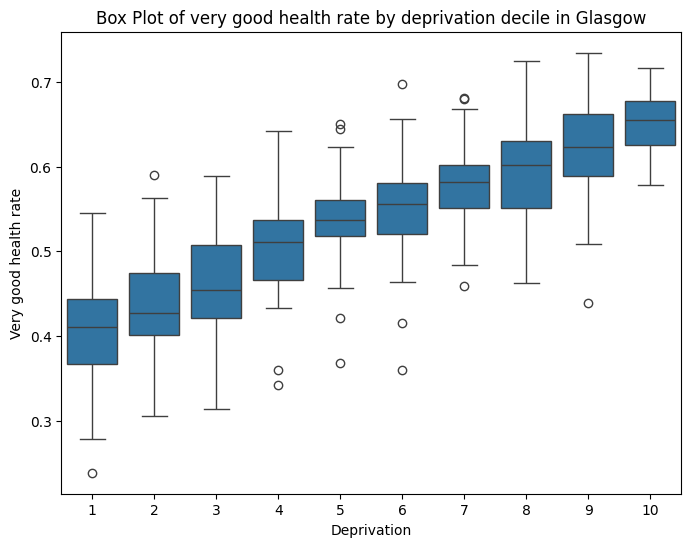

In [ ]:
#Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='SIMD2020v2_Decile', y='Very good health rate', data=healthrate_deprivation)
plt.title('Box Plot of very good health rate by deprivation decile in Glasgow')
plt.xlabel('Deprivation')
plt.ylabel('Very good health rate')
plt.show()

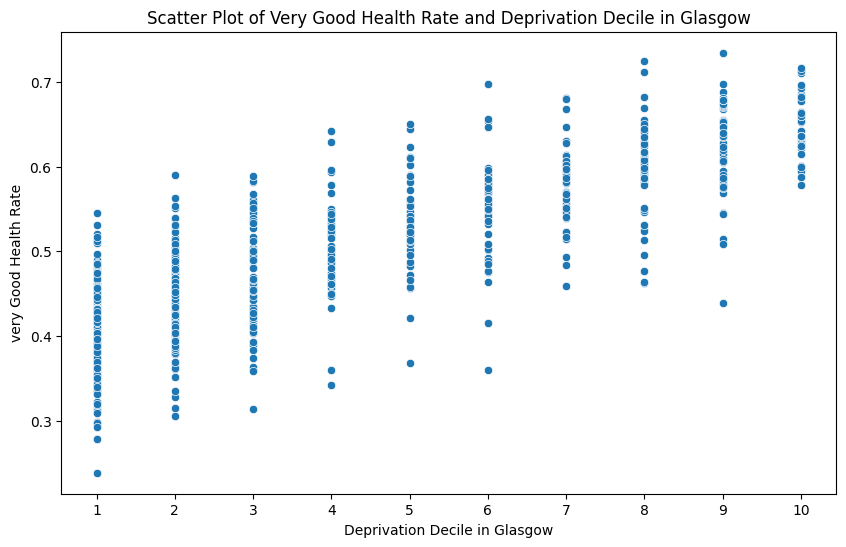

In [ ]:
#visulize the relationship between varibles, 'healthrate' and 'deprivation'。 To findout the outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SIMD2020v2_Decile', y='Very good health rate', data=healthrate_deprivation)
plt.title('Scatter Plot of Very Good Health Rate and Deprivation Decile in Glasgow')
plt.xticks(range(1,11,1))
plt.xlabel('Deprivation Decile in Glasgow')
plt.ylabel('very Good Health Rate')
plt.show()

<Figure size 800x600 with 0 Axes>

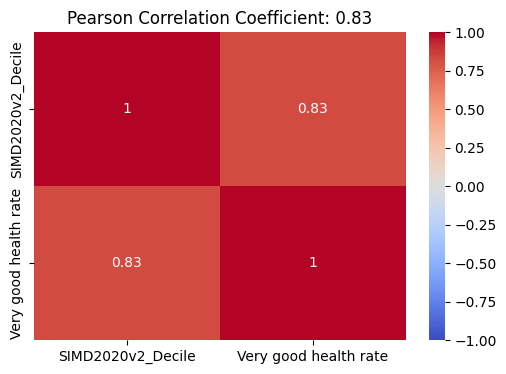

In [ ]:
# @title Step 3. Spatial Regression Analysis Model
#Before apply this model, should confirm the regression between varibles
pearson_correlation=healthrate_deprivation['SIMD2020v2_Decile'].corr(healthrate_deprivation['Very good health rate'])
# plot pearson correlation
plt.figure(figsize=(8, 6))
plt.figure(figsize=(6, 4))
sns.heatmap(data=healthrate_deprivation[['SIMD2020v2_Decile','Very good health rate']].corr(method='pearson'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Pearson Correlation Coefficient: {pearson_correlation:.2f}')
plt.show()

Those 2 varibles, 'deprivation decile' and 'very good health rate', show strong and positve correlation. So that, we can continue to apply spatical regression analysis.

In [ ]:
#left_join healthrate_deprivation to glasgow shape
merged_glasgow =glasgow_shp.merge(healthrate_deprivation[['zone_code','SIMD2020v2_Decile','Very good health rate']], how='left',left_on='DataZone',right_on='zone_code')
#check the new file glasgow_deprivation if merged successfully
merged_glasgow.columns
#merged successfully after checking

Index(['DataZone', 'Name', 'TotPop2011', 'ResPop2011', 'HHCnt2011',
       'StdAreaHa', 'StdAreaKm2', 'Shape_Leng', 'Shape_Area', 'geometry',
       'zone_code', 'SIMD2020v2_Decile', 'Very good health rate'],
      dtype='object')

In [ ]:
#Analyse the how much the Health rates affect for the deprivation
# convert Pandas Serries to NumPy array
y_array = merged_glasgow['SIMD2020v2_Decile'].to_numpy().reshape(-1,1)
x_array = merged_glasgow['Very good health rate'].to_numpy().reshape(-1,1)
# Add a dummy independent variable, a column with all 1
n = len(y_array)
x_dummy = np.ones((n, 1))
# Combine independent variables and constant items into a two-dimensional array
x_combined = np.hstack((x_array, x_dummy))
# build spacial weight matrix
w = Queen.from_dataframe(merged_glasgow)
# build spatical regression model
model = ML_Lag(y=y_array, x=x_combined, w=w)

# print the result
print(model.summary)

<ipython-input-88-c69f565a0646>:10: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(merged_glasgow)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)
/usr/local/lib/python3.10/dist-packages/spreg/ml_lag.py:634: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:         746
Mean dependent var  :      3.9129                Number of Variables   :           3
S.D. dependent var  :      2.9473                Degrees of Freedom    :         743
Pseudo R-squared    :      0.7207
Spatial Pseudo R-squared:  0.6913
Log likelihood      :  -1392.1138
Sigma-square ML     :      2.4228                Akaike info criterion :    2790.228
S.E of regression   :      1.5565                Schwarz criterion     :    2804.072

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

This model employs the Maximum Likelihood Spatial Lag method to analyze the relationship between the dependent variable, referred to as `dep_var`, and two independent variables (`var_1` and `W_dep_var`). The dataset contains 746 observations, with a mean dependent variable value of approximately 3.9129 and a standard deviation of around 2.9473.

The pseudo R-squared value of 0.7207 suggests a relatively good fit of the model, indicating that the included variables explain a significant portion of the variance in the dependent variable. Moreover, the spatial pseudo R-squared value of 0.6913 indicates that spatial aspects are well captured by the model, suggesting that spatial relationships are adequately accounted for.

The log likelihood value of -1392.1138 reflects the overall fit of the model to the data, with higher values indicating better fit. The sigma-square ML, or the estimated variance of the error term, is approximately 2.4228.

The model's coefficients provide insights into the relationships between the variables. Specifically, the constant term is -7.65566, indicating the expected value of the dependent variable when all independent variables are zero. The coefficient for `var_1` is 21.81287, suggesting the effect of this variable on the dependent variable. Similarly, the coefficient for `W_dep_var` is 0.03901, indicating the effect of this spatial lag variable on the dependent variable.

In [ ]:
#Analyse the how much the deprivation affect for the Health rates
# convert Pandas Serries to NumPy array
y_array = merged_glasgow['SIMD2020v2_Decile'].to_numpy().reshape(-1,1)
x_array = merged_glasgow['Very good health rate'].to_numpy().reshape(-1,1)
# Add a dummy independent variable, a column with all 1
n = len(y_array)
y_dummy = np.ones((n, 1))
# Combine independent variables and constant items into a two-dimensional array
y_combined = np.hstack((y_array, y_dummy))
# build spacial weight matrix
w = Queen.from_dataframe(merged_glasgow)
# build spatical regression model
model_reverse = ML_Lag(y=x_array, x=y_combined, w=w)

# print out the result
print(model.summary)

<ipython-input-104-34cd9b5cf5f8>:11: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(merged_glasgow)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)
/usr/local/lib/python3.10/dist-packages/spreg/ml_lag.py:634: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:         746
Mean dependent var  :      3.9129                Number of Variables   :           3
S.D. dependent var  :      2.9473                Degrees of Freedom    :         743
Pseudo R-squared    :      0.7207
Spatial Pseudo R-squared:  0.6913
Log likelihood      :  -1392.1138
Sigma-square ML     :      2.4228                Akaike info criterion :    2790.228
S.E of regression   :      1.5565                Schwarz criterion     :    2804.072

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

This model analyzes the relationship between health rates and specific variables while considering spatial correlation. The model fits the data using the Maximum Likelihood Spatial Lag method, with the dependent variable (i.e., health rates) having a mean of approximately 3.9129 and a standard deviation of about 2.9473. The pseudo R-squared is 0.7207, indicating a good fit of the model, while the spatial pseudo R-squared is 0.6913, suggesting that spatial aspects are well captured. The log likelihood is -1392.1138, indicating a relatively high fit of the model to the given data. Parameter estimates from the model show a constant term of -7.65566, a coefficient of 21.81287 for `var_1`, and a coefficient of 0.03901 for `W_dep_var`. With one variable removed due to being constant, the model has two explanatory variables. Overall, the model provides a credible explanation of health rates, aiding in understanding the relationship between health rates and other factors and supporting related decision-making processes.

In [ ]:
# @title Step 4: Check the accurate of results of models
# get the predicted values
predicted_values = model.predy

# combine the orginal and the predicted values
Predicted_Deprivation = merged_glasgow.copy()
Predicted_Deprivation['Predicted_Deprivation'] = predicted_values

# save the merged file
Predicted_Deprivation.to_csv('predicted_Deprivation.csv', index=False)
files.download('predicted_Deprivation.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# get the predicted values
predicted_values = model_reverse.predy

# combine the orginal and the predicted values
Predicted_Health = merged_glasgow.copy()
Predicted_Health['Predicted_Health'] = predicted_values

# save the merged file
Predicted_Health.to_csv('predicted_health.csv', index=False)
files.download('predicted_health.csv')

In [ ]:
# calculate Mean Square Error
mse = mean_squared_error(Predicted_Deprivation['SIMD2020v2_Decile'], Predicted_Deprivation['Predicted_Deprivation'])

# print MSE
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2.4227936484508312


For this model, which researches the effect of health rate on deprivation, has the higher MSE, where the original values are from 1-10, the MSE reaches about 2.42, **nearly 24% for the real values**.

As a result, the model needs further developments and assessments, which could not be used in this case.

In [ ]:
# calculate MSE
mse = mean_squared_error(Predicted_Deprivation['Very good health rate'], model_reverse.predy)

# print MSE
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.002954129028422979


For this model, which researches the effect of deprivation on the health rate, has the lower MSE, where the original values are from 0-1, the MSE just gets around 0.00295. The closer the MSE is to 0, the more accyrate the model is.

So that, the model could assesse the influence on the deprivation for the health rate in each data zone in Glasgow. In some ways, we can use this model to forcaste the 'very good health rate' in Glasgow.

(249477.7800000002, 271432.0199999996, 655632.1599999996, 673901.8400000004)

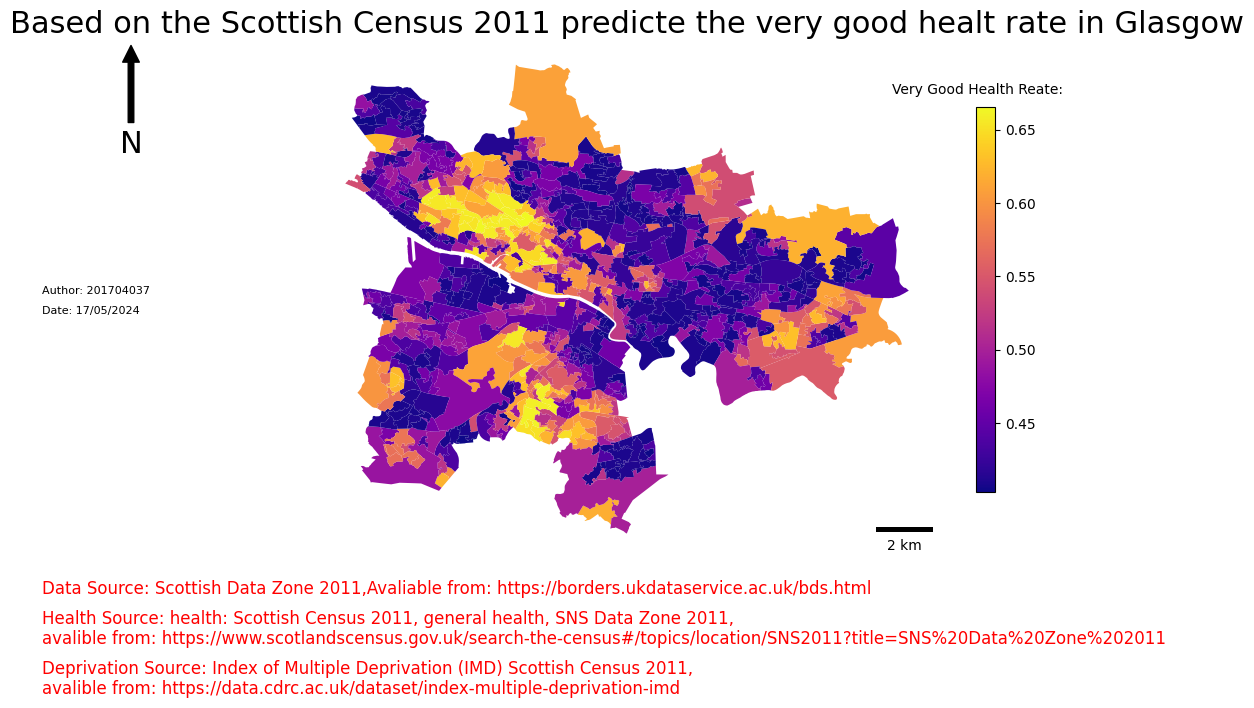

In [ ]:
# @title Step 5. Visulization
fig, ax = plt.subplots(1, 1, figsize=(10,10))

Predicted_Health.plot(
    #get a variable from the PPFI table
    column='Predicted_Health',
    #set the width of outline of the shape
    linewidth=0.5,
    #specify data is categorical
    categorical=False,
    #show legend
    legend=False,
    #set the color palette
    cmap='plasma',
    #set the ax axis
    ax=ax)


# Add a title based on the column plotted
plt.title('Based on the Scottish Census 2011 predicte the very good healt rate in Glasgow',
    #set title style
 {'fontsize': 22,
 'color': 'black',
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'})

#add georeference information
#fig.text(0.87, 0.1, 'Projected CRS:', fontsize=12, color='red')
#fig.text(1, 0.1, glasgow_shp.crs, fontsize=12, color='red')

#declare the data source
fig.text(-0.15, 0.2, "Data Source: Scottish Data Zone 2011,Avaliable from: https://borders.ukdataservice.ac.uk/bds.html", fontsize=12, color='red')

fig.text(-0.15, 0.17, "Health Source: health: Scottish Census 2011, general health, SNS Data Zone 2011, ", fontsize=12, color='red')
fig.text(-0.15, 0.15, "avalible from: https://www.scotlandscensus.gov.uk/search-the-census#/topics/location/SNS2011?title=SNS%20Data%20Zone%202011", fontsize=12, color='red')

fig.text(-0.15, 0.12, "Deprivation Source: Index of Multiple Deprivation (IMD) Scottish Census 2011, ", fontsize=12, color='red')
fig.text(-0.15, 0.1, "avalible from: https://data.cdrc.ac.uk/dataset/index-multiple-deprivation-imd", fontsize=12, color='red')

#set the extral text
fig.text(-0.15, 0.5, "Author: 201704037", fontsize=8, color='black')
fig.text(-0.15, 0.48, "Date: 17/05/2024", fontsize=8, color='black')
fig.text(0.7, 0.7, "Very Good Health Reate:", fontsize=10, color='black')
# Add a north arrow
ax.annotate('N', xy=(-0.3, 1), xytext=(-0.3, 0.8),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=22, color='black', ha='center', va='center',
            xycoords='axes fraction')


# add colorpllate
cbar = plt.colorbar(ax.collections[0], ax=ax, shrink=0.5)

#add a scalebar
scalebar = ScaleBar(1, location='lower right')
ax.add_artist(scalebar)

# Do not plot with the axis showing
plt.axis('off')

**Distribution Describe:**

The area in the northernmost area has the higher 'very good health rate'. Most zones surronding it in the northern Glasgow generally have the lower good health rate. In the western Glasgow, upon the Rive Clyde, most zones have the unfavorable ratios, except some area at in the eastern most corners, which have higher good health situation. In the west of Glasgow, upon Clyde River, some areas have the better situation. But many discts in the western most corner have bad situation in health.

Below the River Clyder, many residents in the eastern districts don't have very good health rate. The people live in the west zones below River Clyder a little better than people in the west below the river, but still have the lower health situation. The citizen in the centre of the southern Glasgow (below the River Clyder) have higher health situation.